In [173]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Cellular automata

## Define the automaton

In [200]:
class Cellular1D:
    
    def __init__(self, init_state, rule):
        self.init_state = np.array(init_state)
        self.rule = np.array(rule)
        
        
    def run(self, n_timesteps, window=[4, 2, 1]): # Window [4, 2, 1] interprets the neighborhood as a binary number
        
        """Runs the automaton for `n_timesteps` steps."""
        
        self.grid = np.zeros([n_timesteps + 1, self.init_state.shape[0]])
        
        self.grid[0] = self.init_state
        
        for i in range(1, self.grid.shape[0]):
            c_i = np.correlate(self.grid[i - 1], window, mode='same').astype('int') # Cast to int for later indexing
            self.grid[i] = self.rule[::-1][c_i]
        
        return self.grid
    
    
def get_rule(rule):
    
    """Takes a decimal rule name and unpacks it to its binary representation"""
    
    rule = np.array([rule], dtype='uint8')
    
    return np.unpackbits(rule)

## Initialize and plot

In [244]:
# Define hyperparams
RULE = 30
STEPS = 500
WIDTH = 100
P = .3

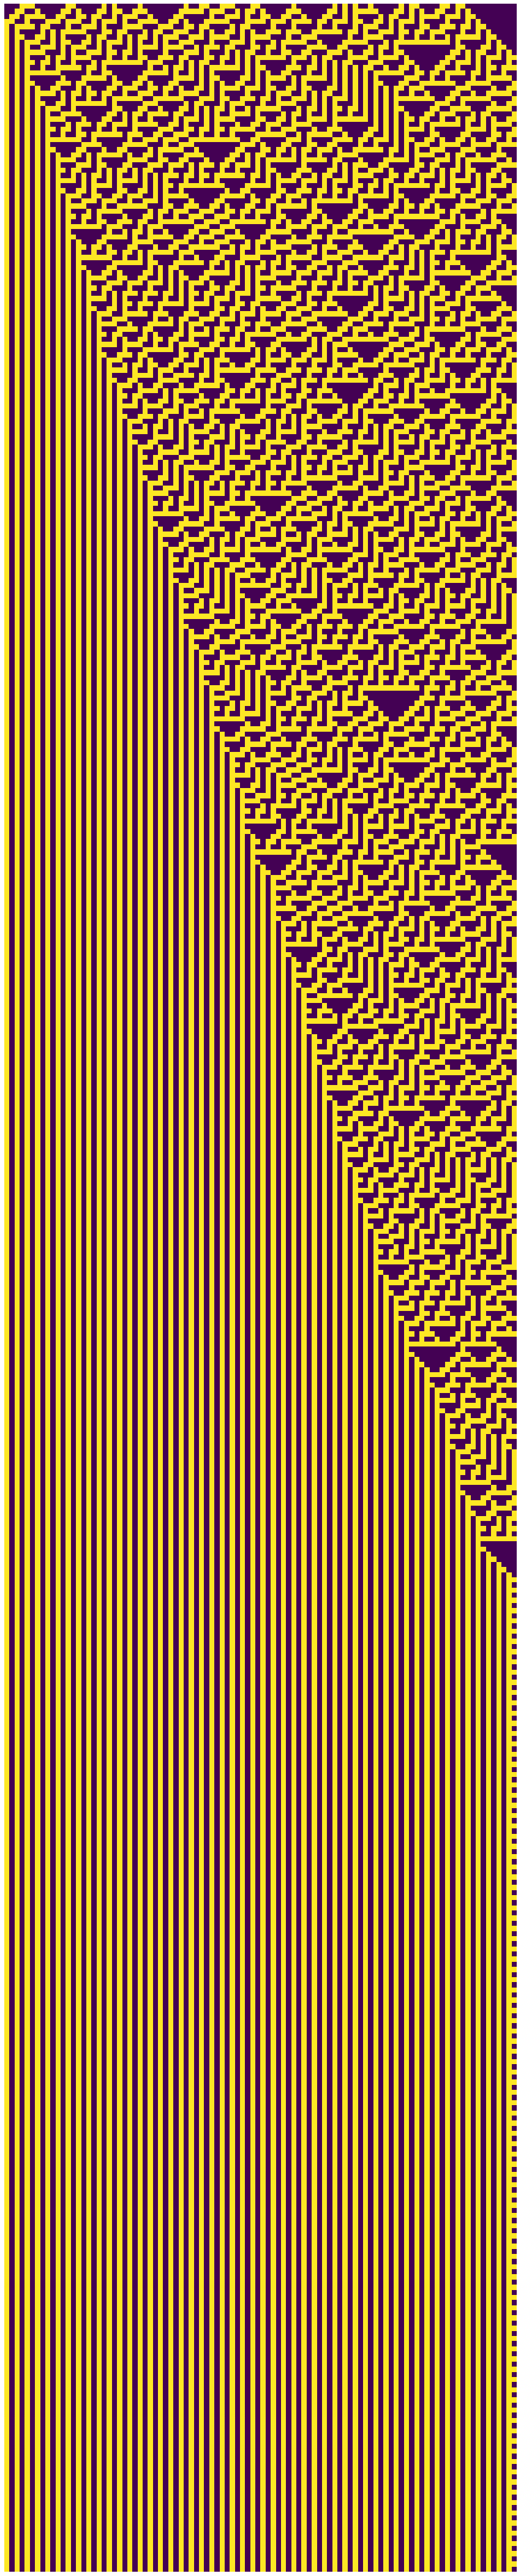

In [245]:
# Define params
init_state = np.random.binomial(1, P, WIDTH)
rule = get_rule(RULE)

# Initialize the automaton
c1 = Cellular1D(init_state, rule)

grid = c1.run(STEPS)

plt.figure(figsize=(15, 100))
plt.imshow(grid, interpolation=None)
plt.axis('off')
plt.show()